In [1]:
import os
import pathlib as pl
from matplotlib import pyplot as plt
from PIL import Image
from DataAugmentation import DataAugmentation
import cv2
import numpy as np
import random

%matplotlib inline

e:\Uni\Kuenstliche-Intelligenz\Projektarbeit\Projektarbeit-Kuenstliche-Intelligenz\Data-Augmentation\DataAugmentation.py:222: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided


In [2]:
da = DataAugmentation()

info = da.analyzeImageDatabase()
info

[('e:\\Uni\\Kuenstliche-Intelligenz\\Projektarbeit\\Projektarbeit-Kuenstliche-Intelligenz\\images\\0 Dosenoeffner',
  []),
 ('e:\\Uni\\Kuenstliche-Intelligenz\\Projektarbeit\\Projektarbeit-Kuenstliche-Intelligenz\\images\\1 Flaschenoeffner',
  []),
 ('e:\\Uni\\Kuenstliche-Intelligenz\\Projektarbeit\\Projektarbeit-Kuenstliche-Intelligenz\\images\\2 Korkenzieher',
  []),
 ('e:\\Uni\\Kuenstliche-Intelligenz\\Projektarbeit\\Projektarbeit-Kuenstliche-Intelligenz\\images\\3 Multi',
  []),
 ('e:\\Uni\\Kuenstliche-Intelligenz\\Projektarbeit\\Projektarbeit-Kuenstliche-Intelligenz\\images\\test',
  [{'filename': '20211217_181033.jpg',
    'type': 'jpg',
    'dimensions': (5664, 3184),
    'size': 3254.4931640625},
   {'filename': '20211217_181244.jpg',
    'type': 'jpg',
    'dimensions': (5664, 3184),
    'size': 3777.0595703125},
   {'filename': '20211217_181805.jpg',
    'type': 'jpg',
    'dimensions': (5664, 3184),
    'size': 3517.5888671875},
   {'filename': '20211217_181910.jpg',
    'ty

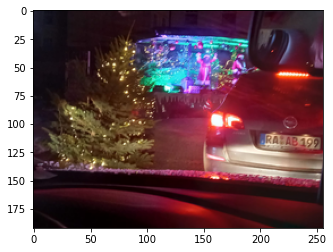

In [3]:
# Image resize ohne padding PILLOW
image = Image.open('E:/Uni/Kuenstliche-Intelligenz/Projektarbeit/Projektarbeit-Kuenstliche-Intelligenz/images/test/IMG-20211217-WA0001.jpg')

image.thumbnail((256, 256), Image.ANTIALIAS)
plt.imshow(image)

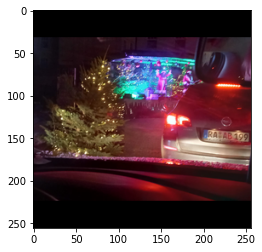

In [4]:
# Image resize mit padding PILLOW
image = Image.open('E:/Uni/Kuenstliche-Intelligenz/Projektarbeit/Projektarbeit-Kuenstliche-Intelligenz/images/test/IMG-20211217-WA0001.jpg')

pad_test = da.expand2square(image, 256, (0, 0, 0))
plt.imshow(pad_test)

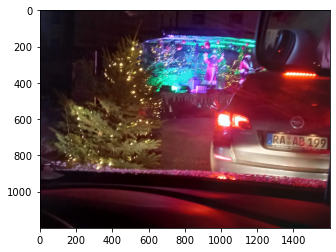

In [5]:
# OPENCV
image = cv2.imread('E:/Uni/Kuenstliche-Intelligenz/Projektarbeit/Projektarbeit-Kuenstliche-Intelligenz/images/test/IMG-20211217-WA0001.jpg')
image = np.flip(image, axis=-1)
plt.imshow(image)

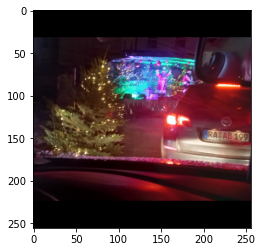

In [6]:
# Image resize mit padding OPENCV
image = cv2.imread('E:/Uni/Kuenstliche-Intelligenz/Projektarbeit/Projektarbeit-Kuenstliche-Intelligenz/images/test/IMG-20211217-WA0001.jpg')
image = da.resizeAndPad(image, (256, 256), 0)
image = np.flip(image, axis=-1)
plt.imshow(image)

In [10]:
def fill(img, h, w):
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img

In [8]:
def horizontal_shift(img, ratio=0.0):
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]
    img = fill(img, h, w)
    return img

In [9]:
def rotation(img, angle):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img

In [10]:
def rotation(img, angle):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img

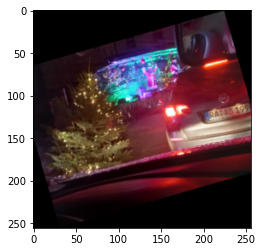

In [11]:
img = rotation(image, 30)
plt.imshow(img)

In [127]:
# Generate a unique list of n floats with two decimal places
def generateUniqueRandomRatios(iterations=100, ratio=1.0, decimals=2):
    ratios = []
    for i in range(iterations):
        x = round(random.uniform(-ratio, ratio), decimals)
        while x in ratios or x == 0:
            x = round(random.uniform(-ratio, ratio), decimals)
        ratios.append(x)
    return ratios

In [111]:
len(generateUniqueRandomRatios())

100

In [153]:
def generateUniformRatios(iterations=10, ratio=1, decimals=2):
    return [round(x, decimals) for x in np.arange(-ratio, ratio+ratio/iterations*2, ratio/iterations*2) if round(x, decimals) != 0]

In [155]:
generateUniformRatios()

[-1.0, -0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8, 1.0]

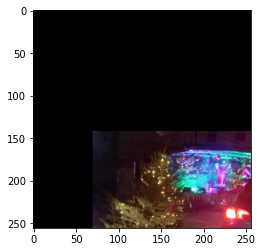

In [120]:
trans_mat = np.float32([[1, 0, 70], [0, 1, 110]])
plt.imshow(cv2.warpAffine(image, trans_mat, image.shape[:2]))

In [164]:
def horizontalShift(img, ratio=0.0, iterations=10, decimals=2, uniform=True):
        imgs = []
        h, w = img.shape[:2]
        print(w)
        gen_func = generateUniformRatios if uniform else generateUniqueRandomRatios
        for ratio in gen_func(iterations, ratio, decimals):
            trans_mat = np.float32([
                    [1, 0, w*ratio],
                    [0, 1, 0]
            ])
            imgs.append(cv2.warpAffine(img, trans_mat, img.shape[:2]))
        return imgs

In [173]:
imgs = horizontalShift(image, 0.5, 10, 2)

256


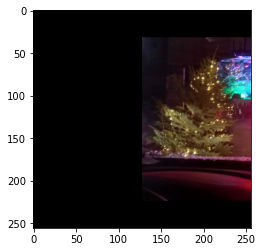

In [175]:
plt.imshow(imgs[9])

In [177]:
[angle for angle in range(0, 360, int(360/2))]

[0, 180]